Import libraries

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Open data

In [23]:
os.chdir('D:\python\Iris_Flower')
data = pd.read_csv('Iris_data.csv')

print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Print the values ​​of each column

In [24]:
for col in data.columns:
    print('\n', data[col].value_counts())


 sepal_length
5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
6.4     7
5.5     7
5.8     7
4.9     6
6.0     6
5.4     6
5.6     6
6.1     6
6.5     5
4.8     5
7.7     4
6.9     4
4.6     4
5.2     4
6.2     4
4.4     3
7.2     3
5.9     3
6.8     3
4.7     2
6.6     2
4.3     1
7.0     1
5.3     1
4.5     1
7.1     1
7.3     1
7.6     1
7.4     1
7.9     1
Name: count, dtype: int64

 sepal_width
3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.3     6
3.5     6
3.8     6
2.6     5
2.3     4
3.7     3
3.6     3
2.2     3
2.4     3
3.9     2
4.4     1
4.2     1
4.1     1
4.0     1
2.0     1
Name: count, dtype: int64

 petal_length
1.5    14
1.4    12
4.5     8
5.1     8
1.3     7
1.6     7
5.6     6
4.9     5
4.0     5
4.7     5
1.7     4
4.8     4
5.0     4
4.4     4
4.2     4
4.1     3
3.9     3
5.8     3
5.7     3
5.5     3
6.1     3
4.6     3
1.9     2
5.2     2
5.4     2
1.2     2
3.3     2
3.5     2
6.7     2
5.3     2
4.3     2
5.9     2
6.0 

Data information

In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Mathematical data statistics

In [26]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


New columns

In [27]:
# PL_SL = Petal Length to Sepal Length Ratio
data['PL_SL'] = round(data['petal_length'] / data['sepal_length'] * 100).astype('int64')

# PL_SL = Petal Width to Sepal Width Ratio
data['PW_SW'] = round(data['petal_width'] / data['sepal_width'] * 100).astype('int64')

Data sharing

In [28]:
data_setosa = data[data['species'] == 'Iris-setosa']
data_versicolor = data[data['species'] == 'Iris-versicolor']
data_virginica = data[data['species'] == 'Iris-virginica']

# choose a color for each category
flower_colors = {'data_setosa': 'blue', 'data_versicolor': 'red', 'data_virginica': 'green'}

Histogram chart

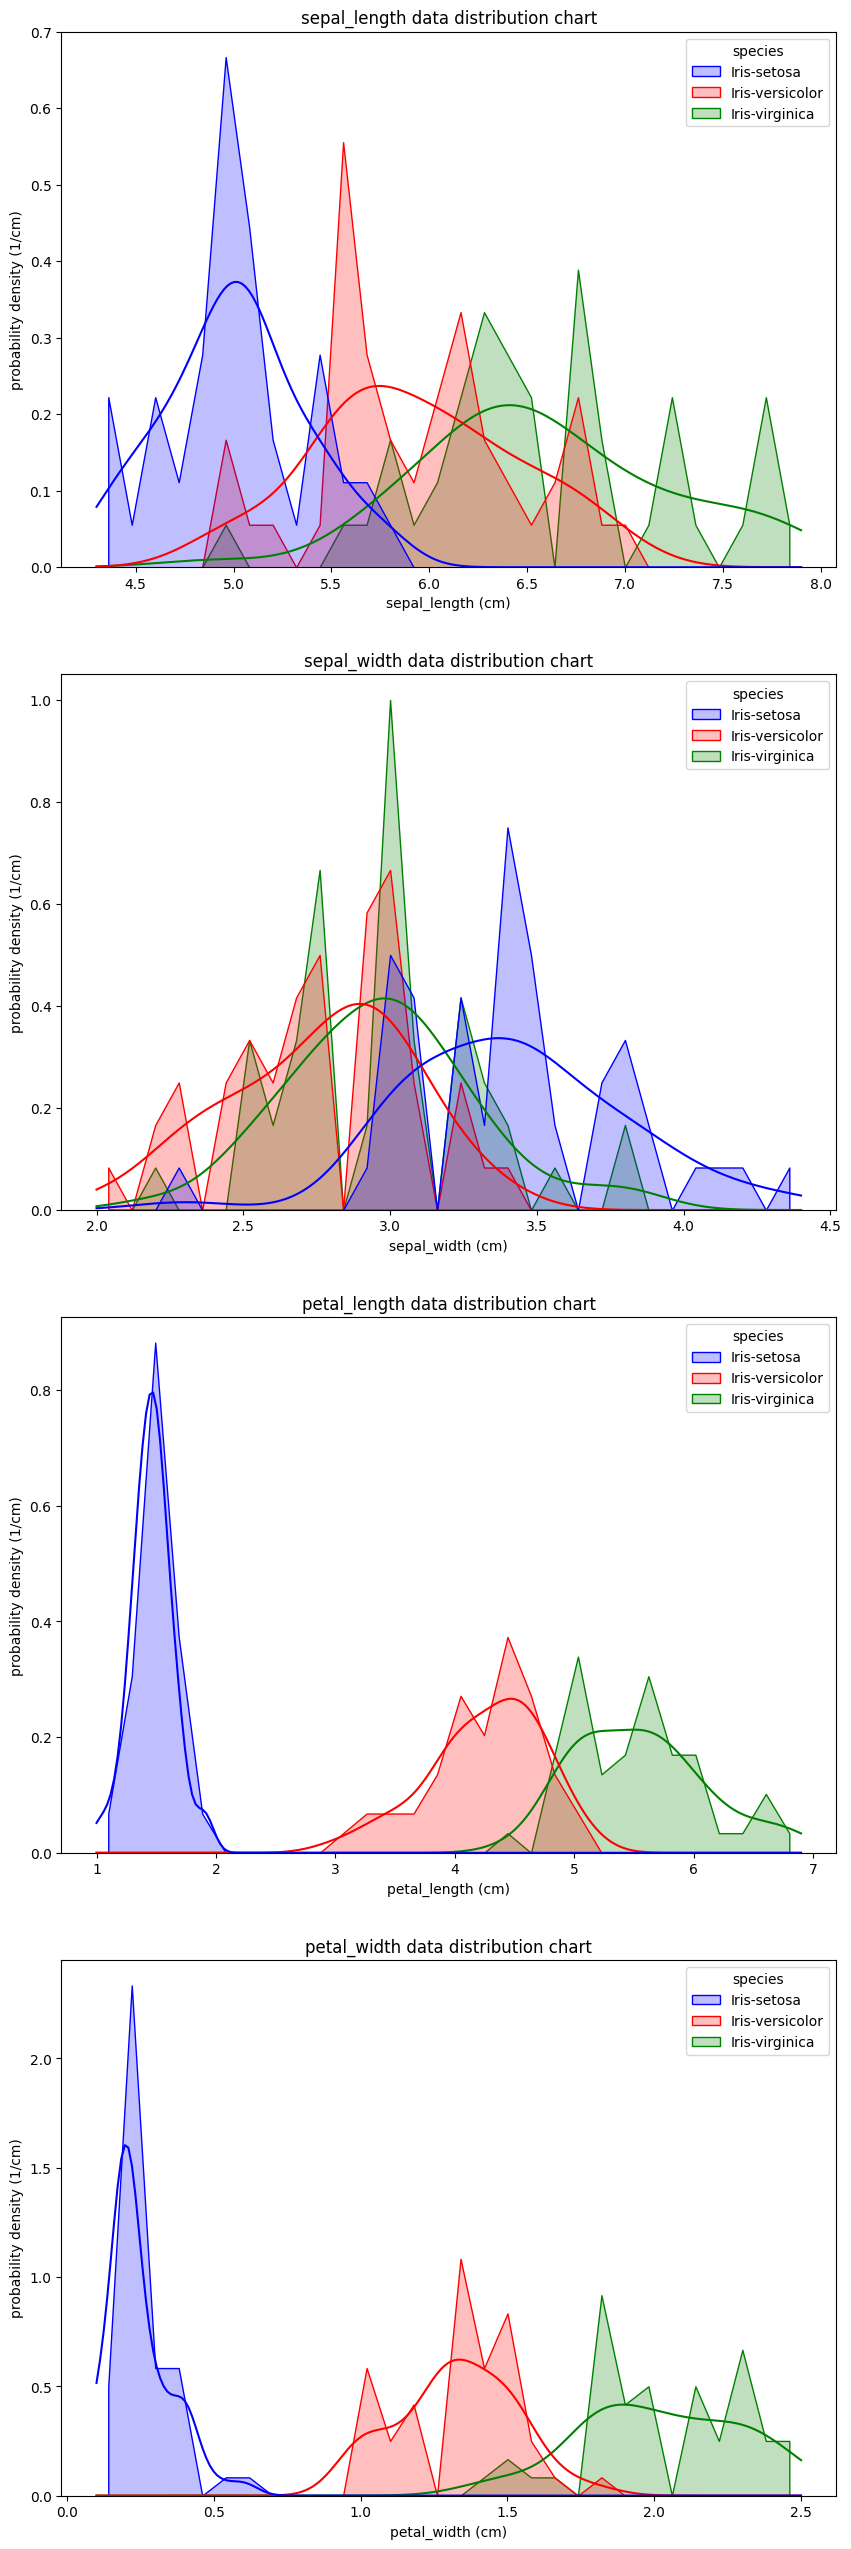

In [29]:
a1 = 1
plt.figure(figsize=(10, 32))

for col in data.select_dtypes('float64').columns:
    plt.subplot(4, 1, a1)
    plt.title(f"{col} data distribution chart")
    plt.xlabel(f"{col} (cm)")
    plt.ylabel("probability density (1/cm)")

    sns.histplot(data=data, x=col, hue='species', palette=flower_colors.values(), bins=30,
                 element='poly', kde=True, stat='density')
    a1 += 1

plt.show()

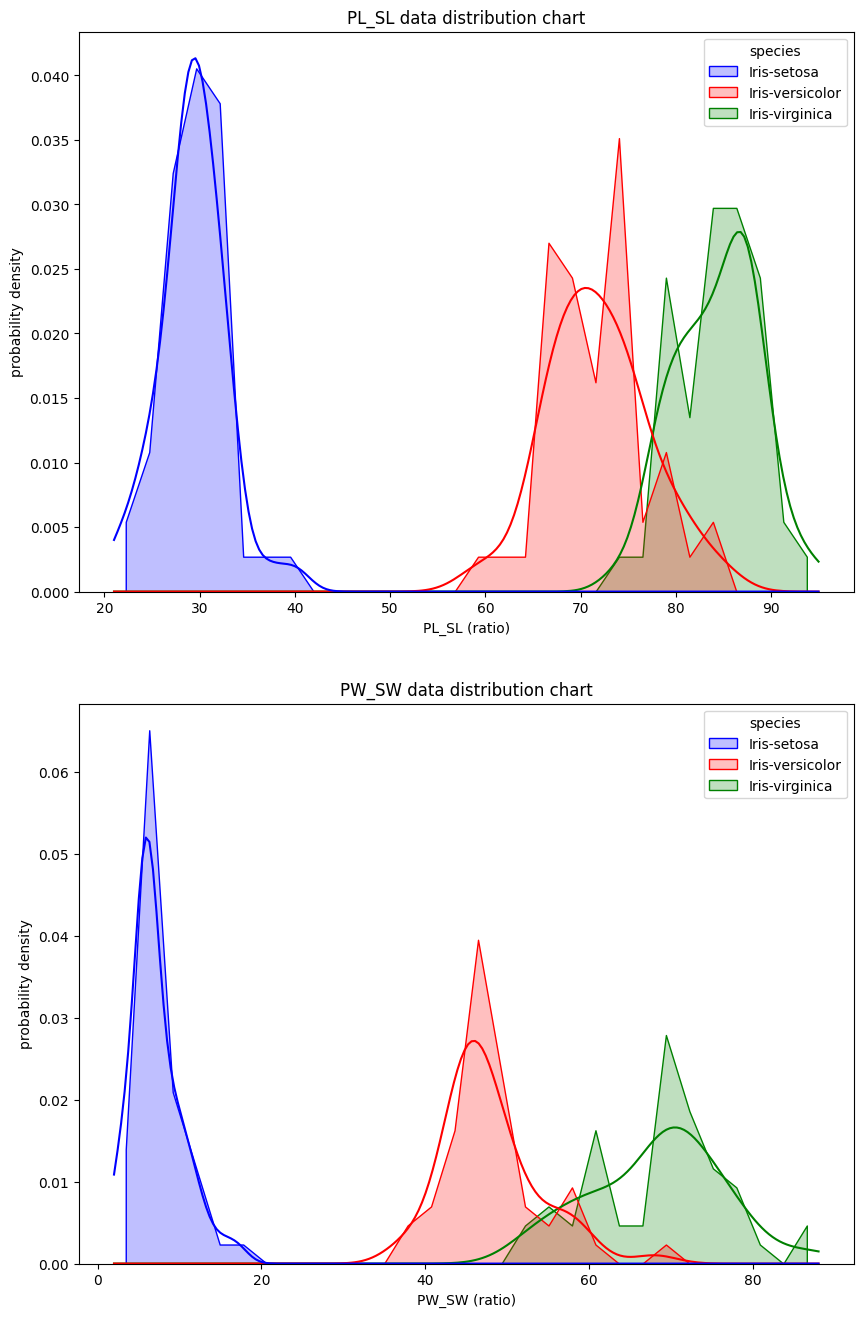

In [30]:
a1 = 1
plt.figure(figsize=(10, 16))

for col in data.select_dtypes('int64').columns:
    plt.subplot(2, 1, a1)
    plt.title(f"{col} data distribution chart")
    plt.xlabel(f"{col} (ratio)")
    plt.ylabel("probability density")

    sns.histplot(data=data, x=col, hue='species', palette=flower_colors.values(), bins=30,
                 element='poly', kde=True, stat='density')
    a1 += 1

plt.show()

Scatter chart

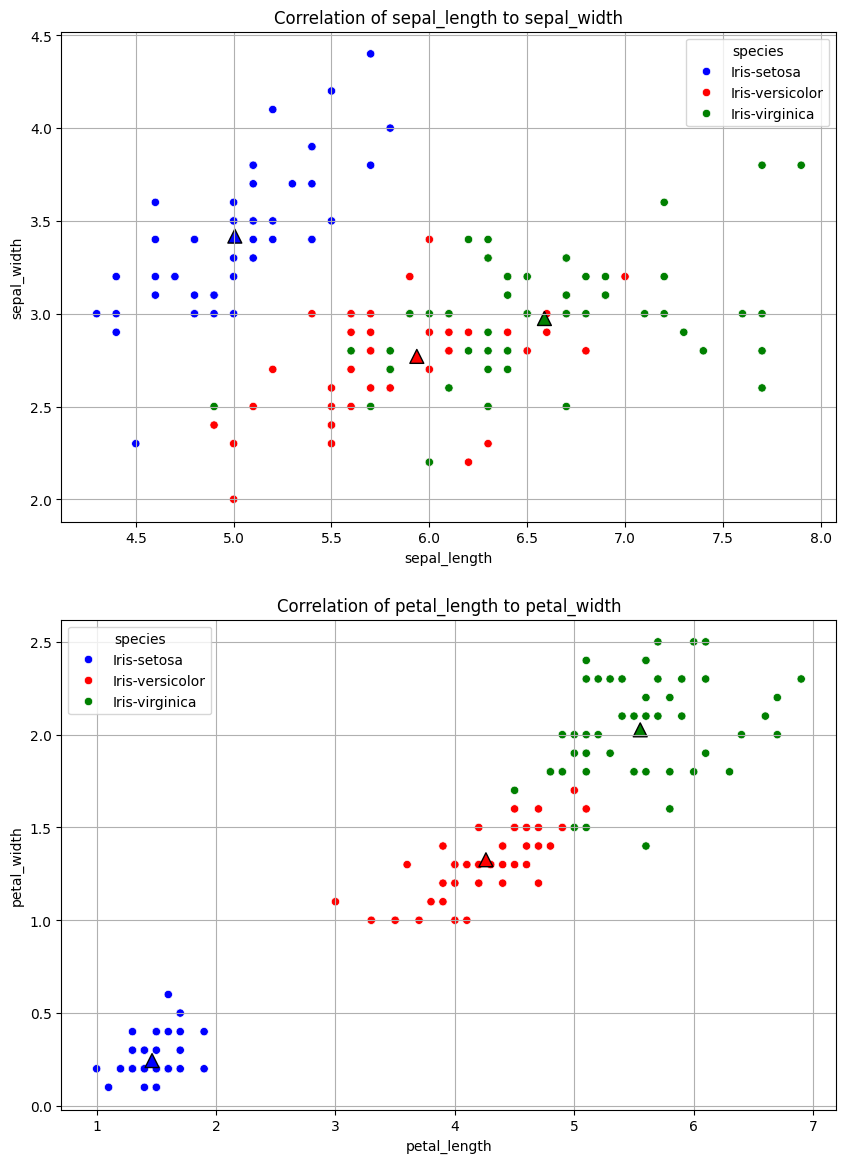

In [31]:
a1 = 1
quantity = [['sepal_length', 'sepal_width'], ['petal_length', 'petal_width']]
plt.figure(figsize=(10, 14))
mean_data = pd.concat([data_setosa.describe(), data_versicolor.describe(),
                       data_virginica.describe()], axis=1).T['mean']

for i, j in quantity:
    plt.subplot(2, 1, a1)
    plt.title(f"Correlation of {i} to {j}")
    plt.xlabel(i)
    plt.ylabel(j)

    sns.scatterplot(data=data, x=i, y=j, hue='species', palette=flower_colors.values())

    # triangles indicate average sizes.
    plt.scatter(x=mean_data[i], y=mean_data[j], marker='^', color=flower_colors.values(), s=100,
                edgecolors='black')
    plt.grid()
    a1 += 1
plt.show()

Heatmap chart

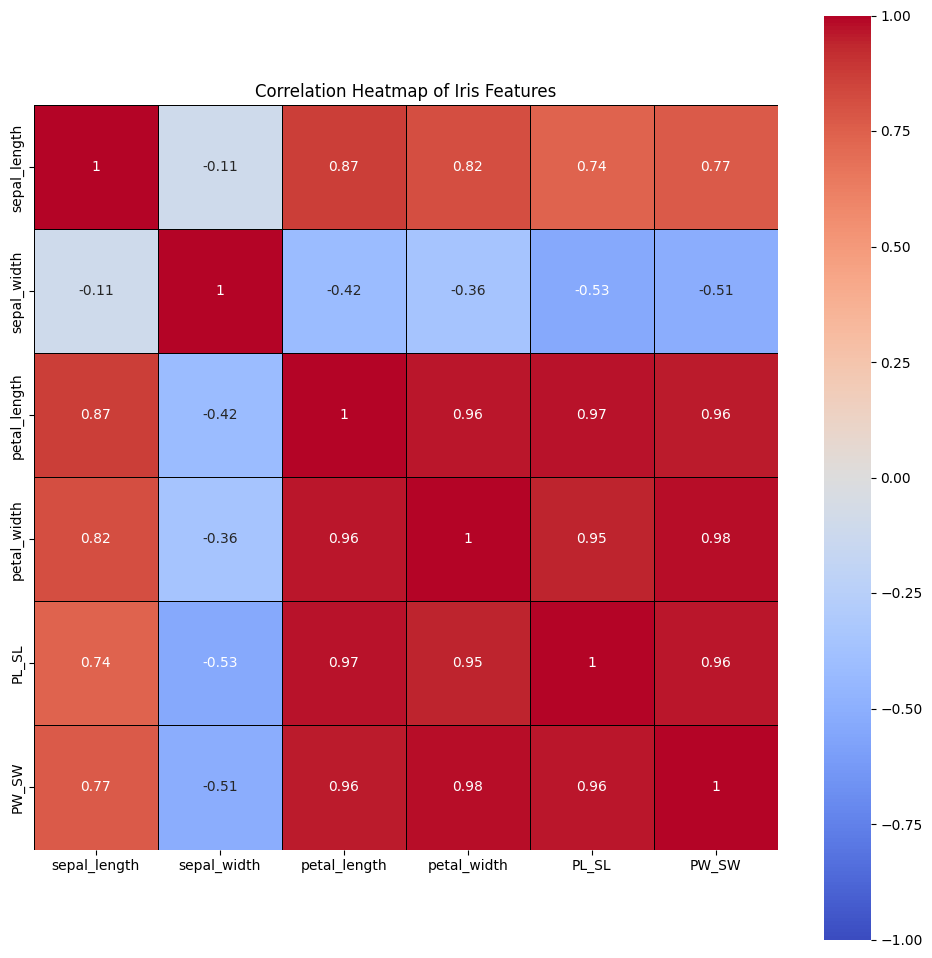

In [32]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.drop('species', axis=1).corr(), cmap='coolwarm', annot=True,
            linewidths=0.5, linecolor='black', square=True, vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap of Iris Features")
plt.show()

Box chart

C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8556\4077624471.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='species', y=col, palette=flower_colors.values(),
C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8556\4077624471.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='species', y=col, palette=flower_colors.values(),
C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8556\4077624471.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='species', y=col, palette=flower_col

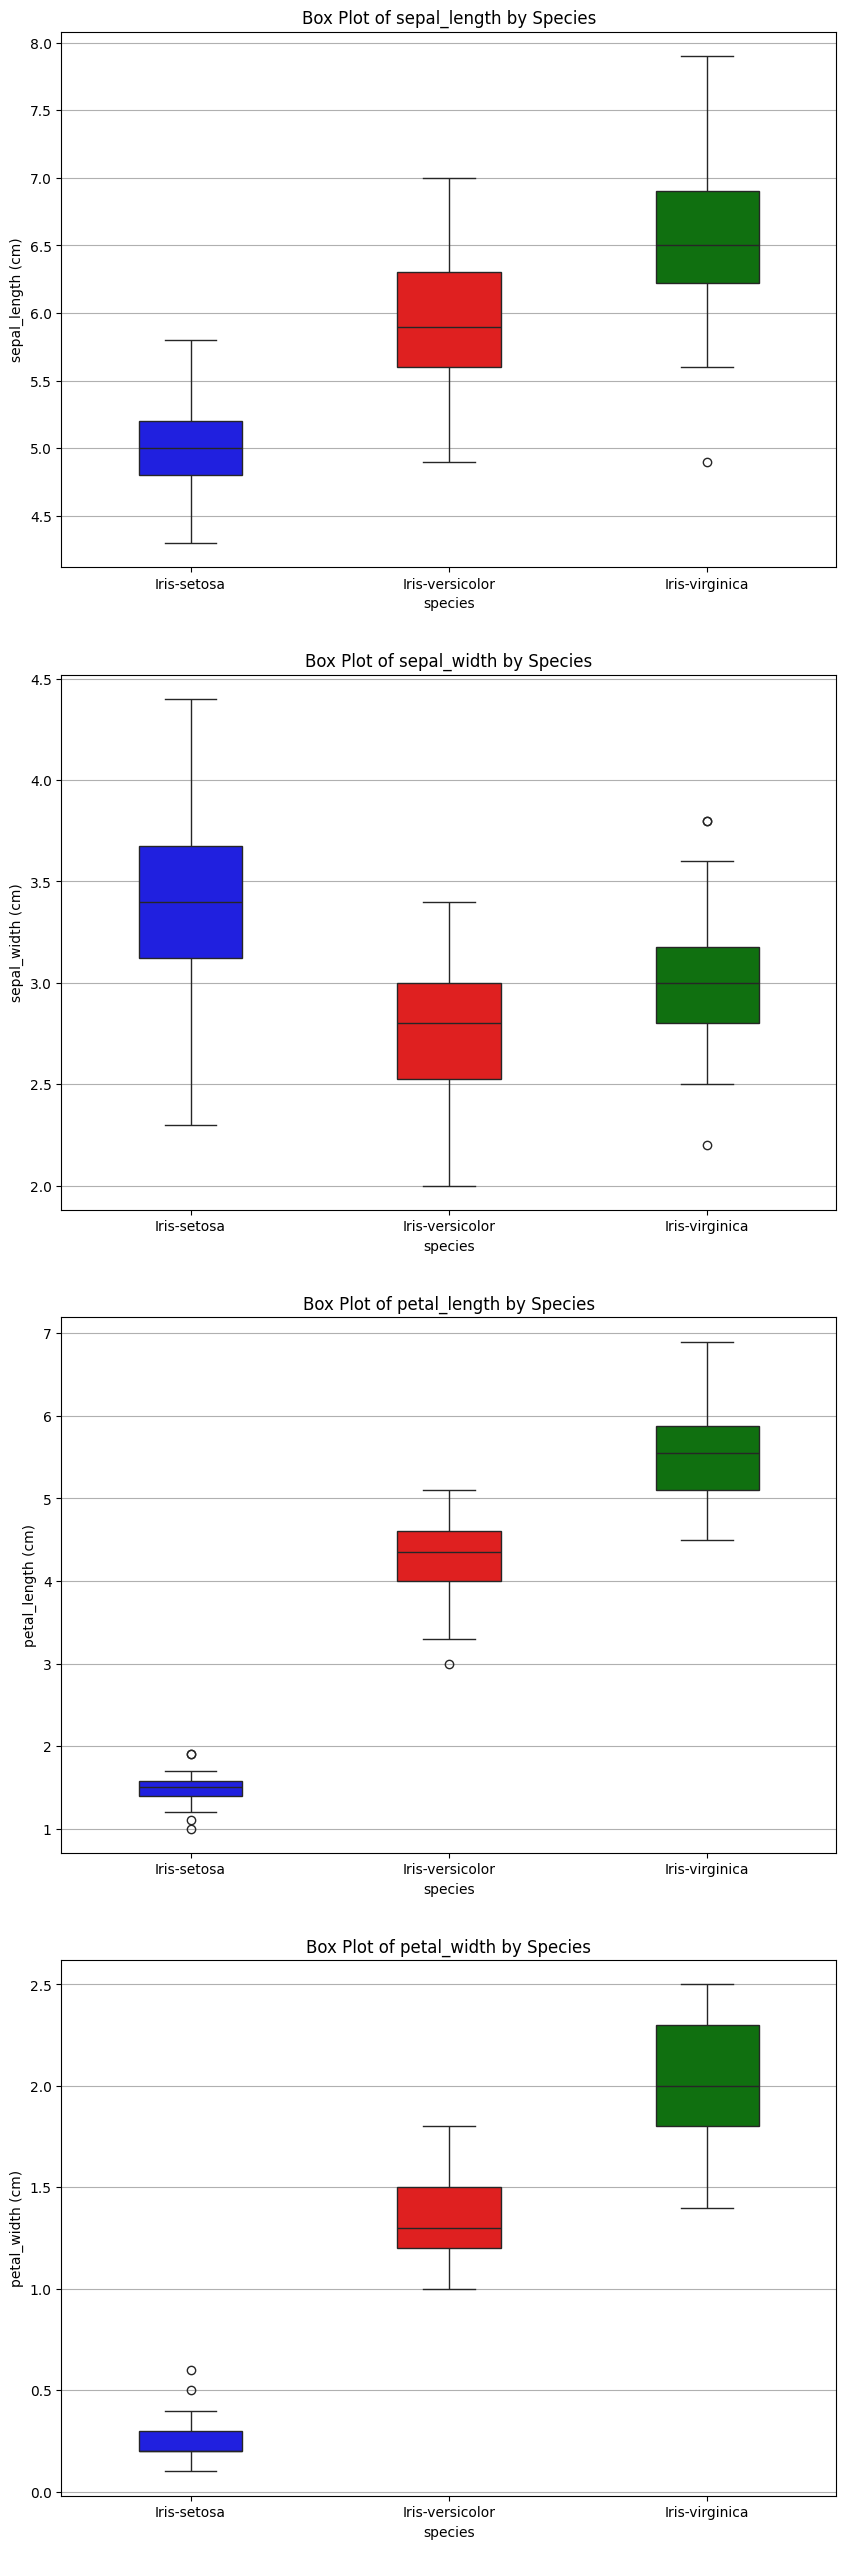

In [33]:
a1 = 1
plt.figure(figsize=(10, 32))

for col in data.select_dtypes('float64').columns:
    plt.subplot(4, 1, a1)
    plt.title(f"Box Plot of {col} by Species")
    plt.ylabel(f"{col} (cm)")

    sns.boxplot(data=data, x='species', y=col, palette=flower_colors.values(),
                width=0.4)
    plt.grid(axis='y')
    a1 += 1

plt.show()

Iris percentage chart

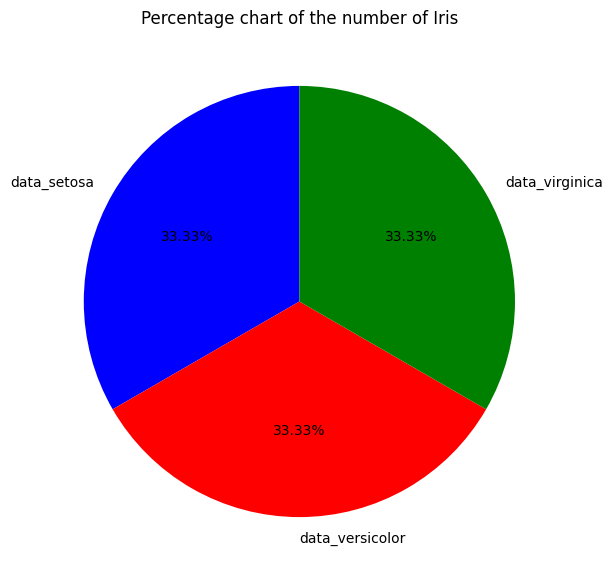

In [34]:
plt.figure(figsize=(7, 7))
plt.pie(data['species'].value_counts(), labels=flower_colors.keys(), autopct='%1.2f%%', colors=flower_colors.values(),
        startangle=90)
plt.title("Percentage chart of the number of Iris")
plt.show()

Pairwise Relationships of Iris Flower Features

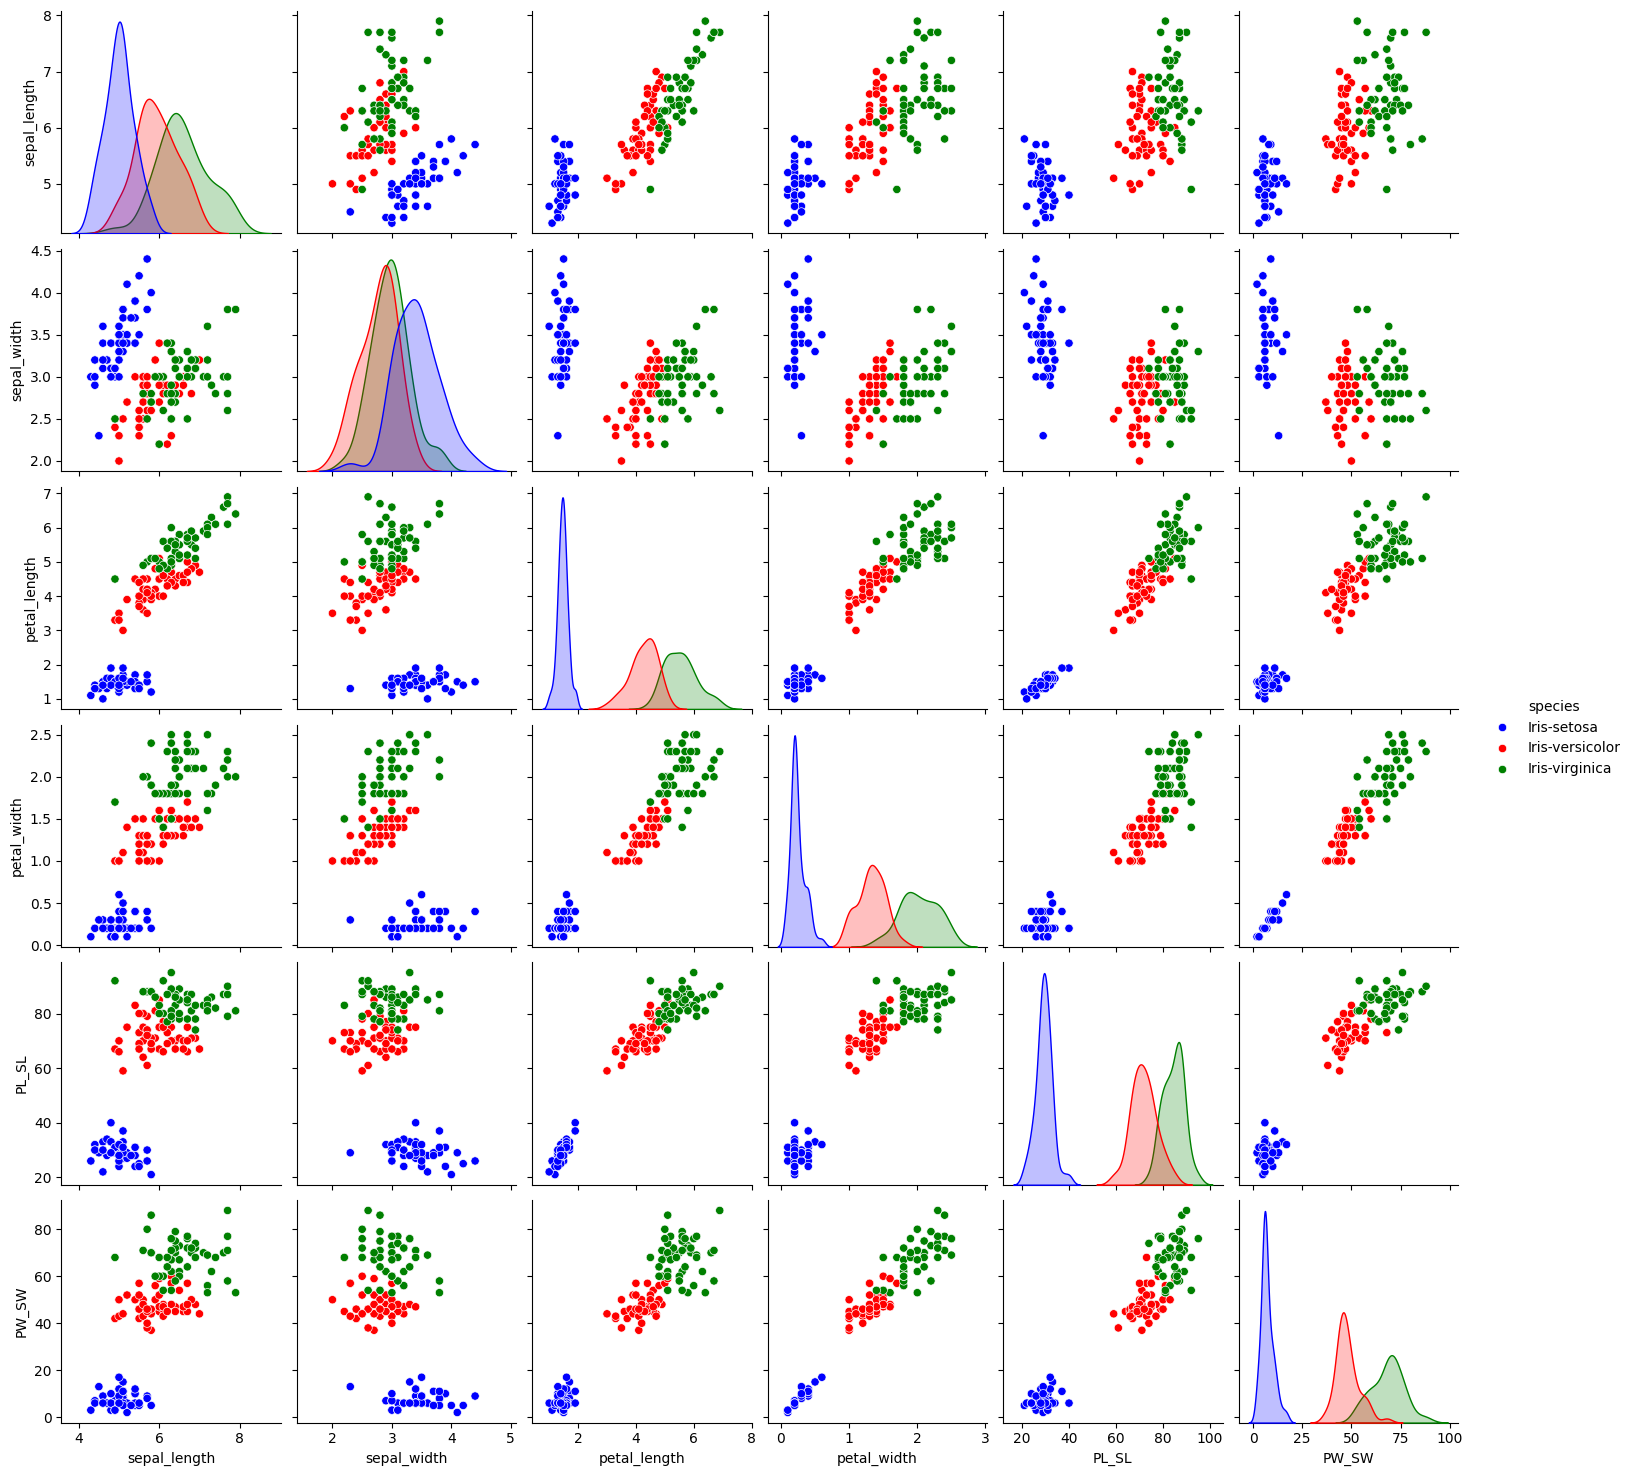

In [35]:
sns.pairplot(data=data, hue='species', kind='scatter', palette=flower_colors.values())
plt.show()

Violin chart

C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8556\3951076372.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='species', y=col, palette=flower_colors.values(),
C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8556\3951076372.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='species', y=col, palette=flower_colors.values(),
C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8556\3951076372.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='species', y=col, palette=f

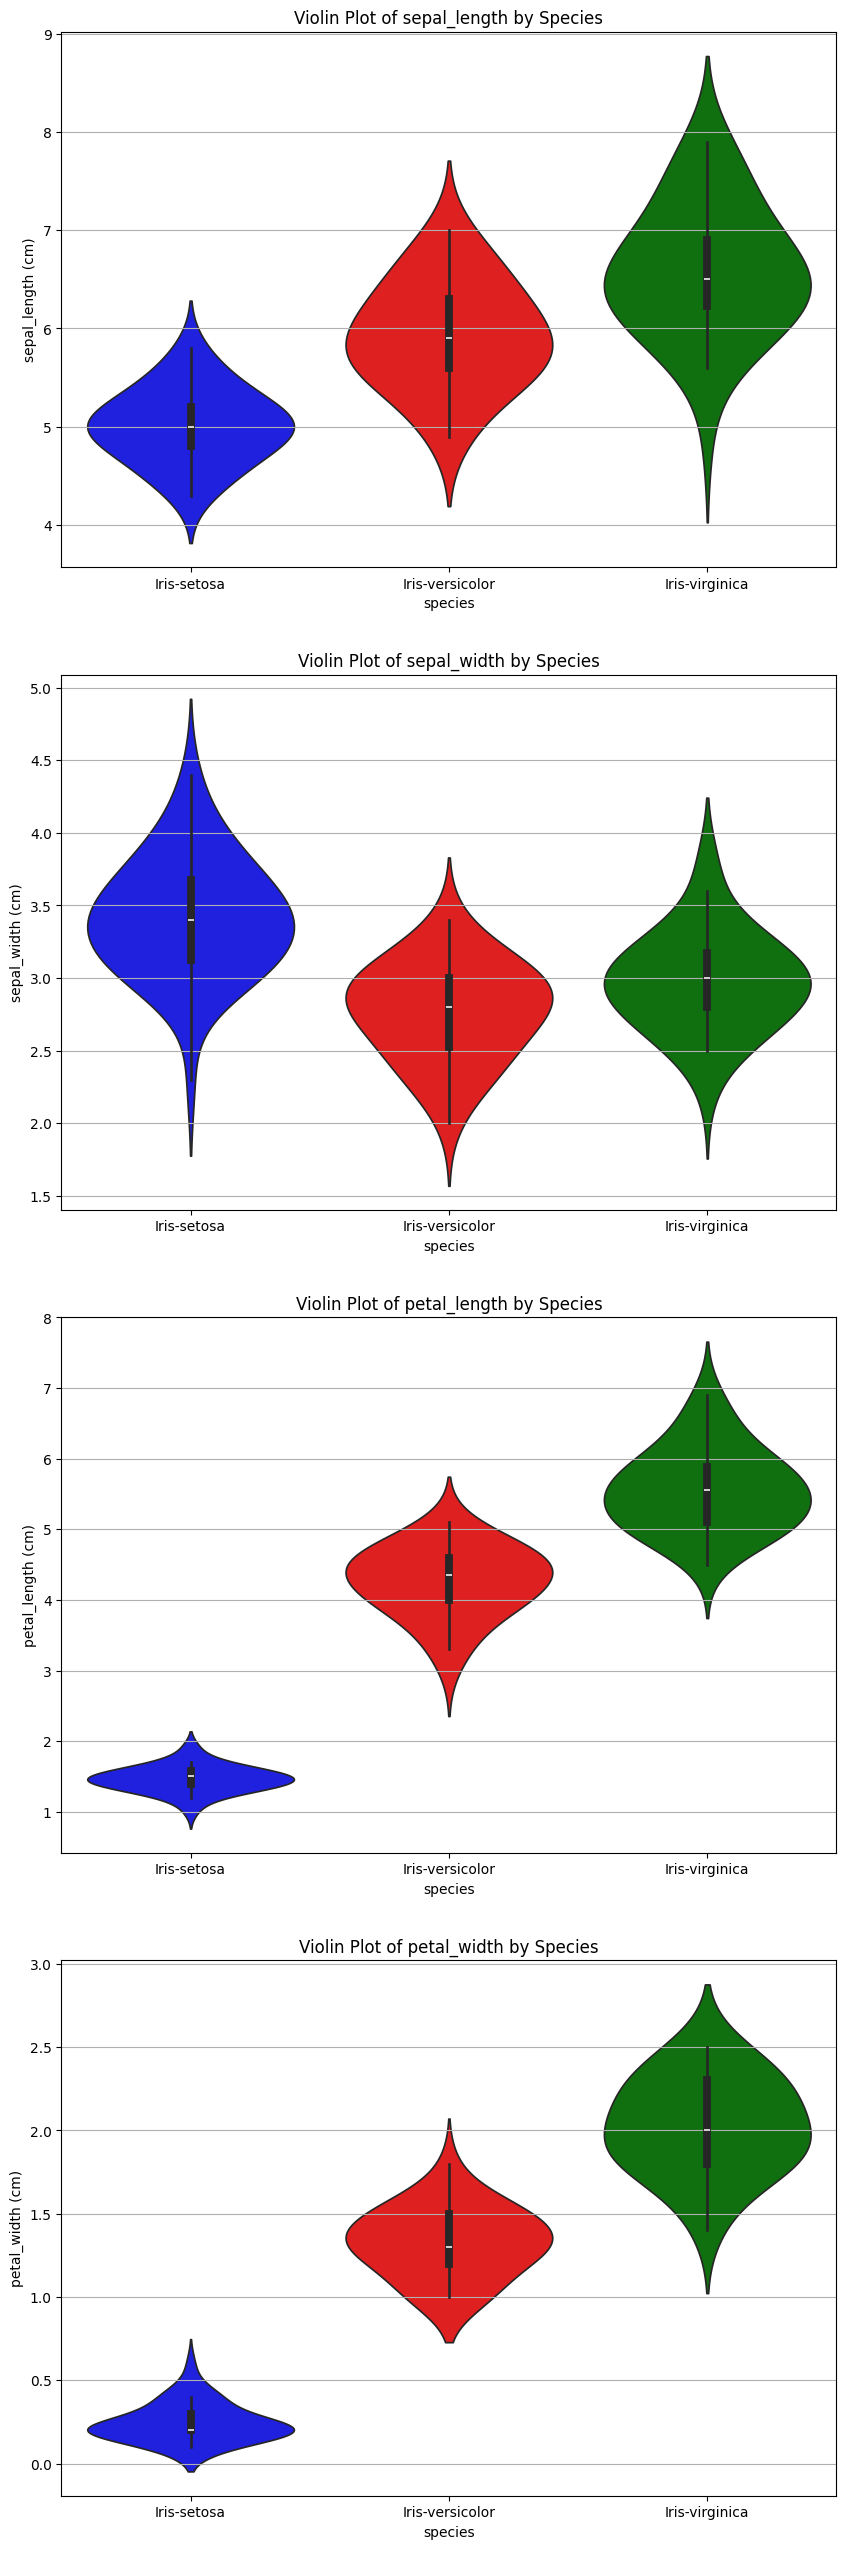

In [36]:
a1 = 1
plt.figure(figsize=(10, 32))

for col in data.select_dtypes('float64').columns:
    plt.subplot(4, 1, a1)
    plt.title(f"Violin Plot of {col} by Species")
    plt.ylabel(f"{col} (cm)")

    sns.violinplot(data=data, x='species', y=col, palette=flower_colors.values(),
                   inner='box', bw_adjust=1.5, )
    plt.grid(axis='y')
    a1 += 1

plt.show()

Swarm chart

C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8556\968922657.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data, x='species', y=col, palette=flower_colors.values(),
C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8556\968922657.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data, x='species', y=col, palette=flower_colors.values(),
C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8556\968922657.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data, x='species', y=col, palette=flower_

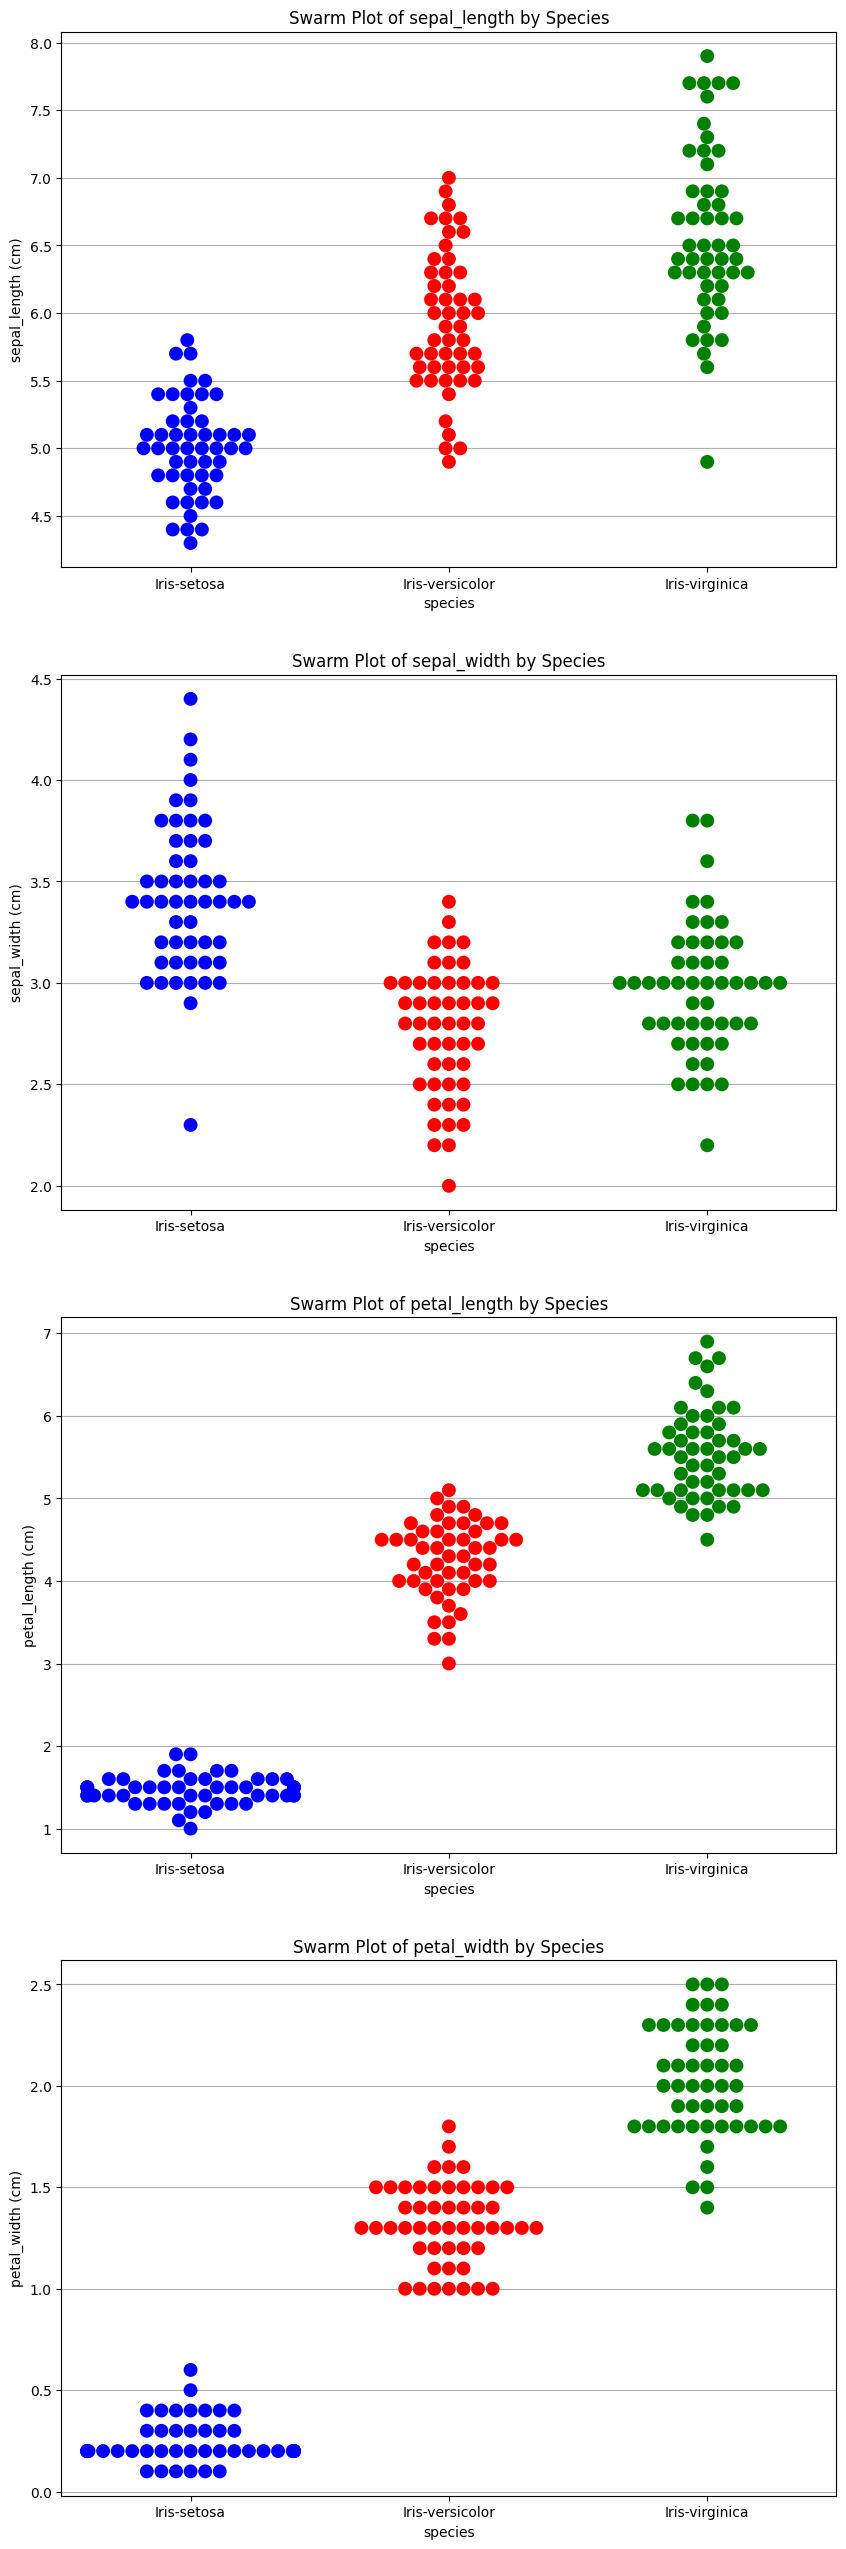

In [37]:
a1 = 1
plt.figure(figsize=(10, 32))

for col in data.select_dtypes('float64').columns:
    plt.subplot(4, 1, a1)
    plt.title(f"Swarm Plot of {col} by Species")
    plt.ylabel(f"{col} (cm)")

    sns.swarmplot(data=data, x='species', y=col, palette=flower_colors.values(),
                  size=10)
    plt.grid(axis='y')
    a1 += 1

plt.show()

Min-Max chart

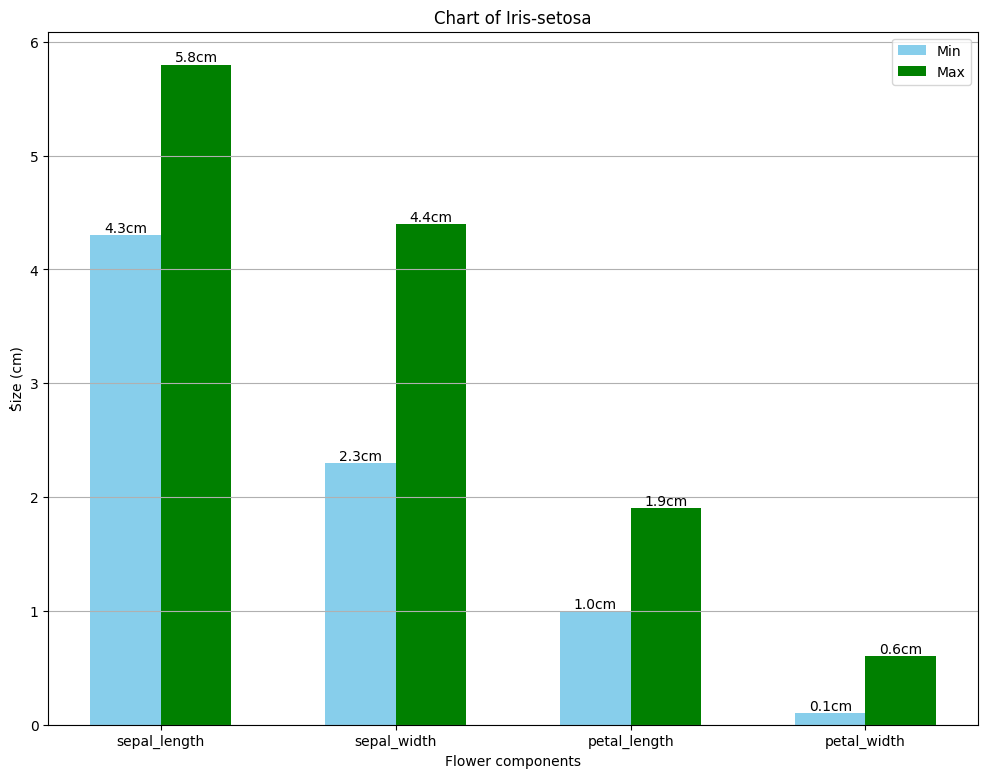

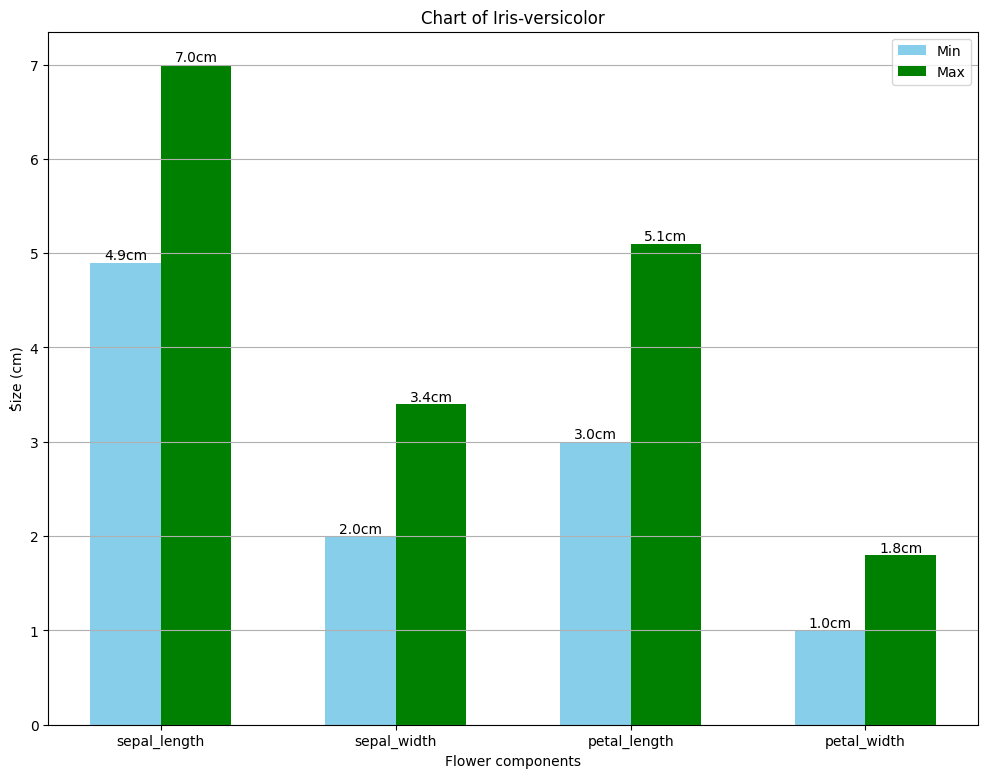

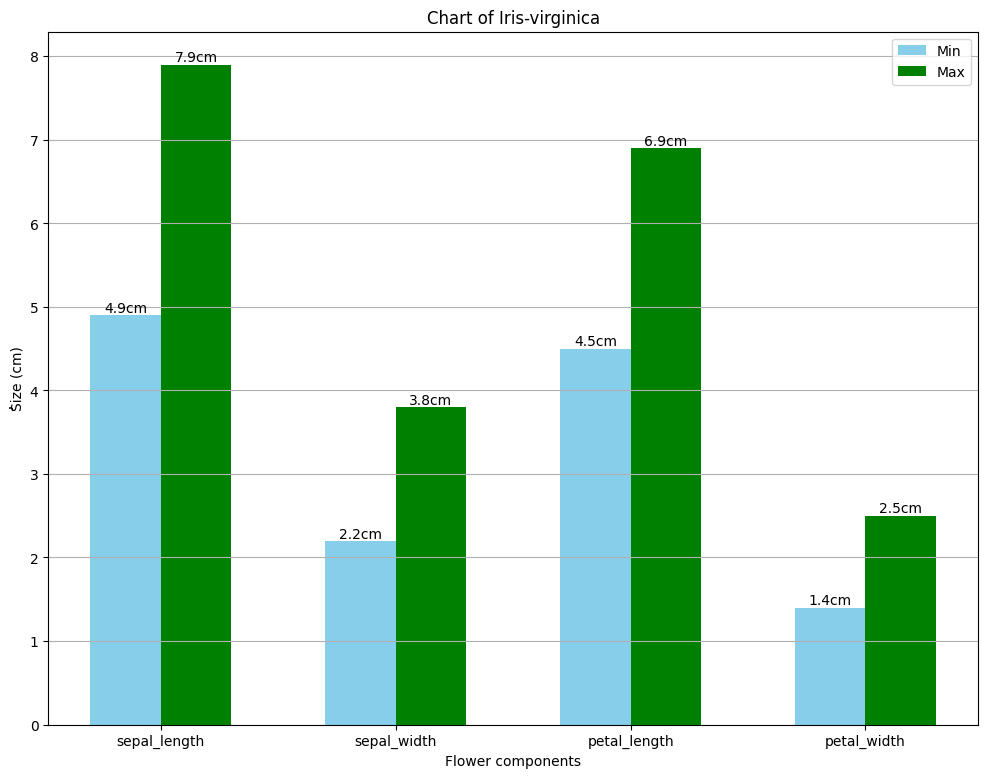

In [38]:
def min_max_chart(quantity):
    # data classification
    min_data = quantity.select_dtypes('float64').describe().T['min']
    max_data = quantity.select_dtypes('float64').describe().T['max']

    #definition of variables
    thickness = 0.3
    number_columns = np.arange(len(min_data.index))
    gride_min_max_chart = ["Min", "Max"]

    #draw a diagram
    plt.figure(figsize=(12, 9))
    plt.bar(number_columns - (thickness/2), height=min_data, width=thickness, color='skyblue')
    plt.bar(number_columns + (thickness/2), height=max_data, width=thickness, color='green')

    for i, j in enumerate(min_data):
        plt.text(i - (thickness/2), j, str(f"{j}cm"), ha='center', va='bottom', fontsize=10, color='black')
    for i, j in enumerate(max_data):
        plt.text(i + (thickness/2), j, str(f"{j}cm"), ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Chart of {quantity['species'].values[0]}")
    plt.xlabel("Flower components")
    plt.ylabel("ُSize (cm)")
    plt.xticks(number_columns, min_data.index)
    plt.legend(gride_min_max_chart)
    plt.grid(axis='y')

    plt.show()

min_max_chart(data_setosa)
min_max_chart(data_versicolor)
min_max_chart(data_virginica)

Split data

In [39]:
x = data.drop('species', axis=1)
y = data['species']

# data conversion
y = y.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_8556\1337340302.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})


Data normalization

In [40]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled, columns=x.columns)

Train-Test-Split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2,
                                                    random_state=42)

Model making

In [42]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model_score = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model: {int(model_score * 100)}%")

Accuracy of the model: 100%
